In [1]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import xgboost as xgb

import pandas as pd
import numpy as np

In [2]:
np.random.seed(0)

In [7]:
df = pd.read_parquet("../data/df.parquet")

,id,yr_mfr,kms_run,sale_price,times_viewed,assured_buy,total_owners,original_price,booking_down_pymnt,reserved,warranty_avail,make_encoded,fuel_type_encoded,body_type_encoded,car_rating_encoded,transmission_encoded
0,1,2012,69029,364299,2068,True,3,365029.0,54645,False,False,14,2,3,2,1
4,5,2017,53648,1082011,2927,True,1,1125840.0,162302,False,False,7,0,4,2,0
6,7,2010,59295,286399,506,True,2,286499.0,42960,False,False,7,2,0,1,1
7,8,2014,50294,283299,1281,True,1,349654.0,42495,False,False,14,2,0,2,1
9,10,2013,116848,205299,1069,True,1,263694.0,30795,False,False,14,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,6383,2016,41739,537999,2610,True,1,673053.0,80700,True,False,14,0,3,2,1
6384,6385,2016,62899,528199,1826,True,1,639270.0,79230,True,False,14,0,3,2,2
6385,6386,2019,55048,380799,1657,True,1,454738.0,57120,True,False,14,2,0,2,1
6386,6387,2018,43035,315899,2559,True,1,358430.0,47385,True,False,20,2,0,1,1


In [8]:
y = df["sale_price"]
df.drop(columns=['sale_price'], inplace=True)
X = df

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.25)

In [9]:
xgb_regressor = xgb.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123)
xgb_regressor = xgb_regressor.fit(X_train, y_train)

MAE = []
MSE = []
R2 = []

n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X_train, y_train, replace=True)
    # make predictions
    y_hat = xgb_regressor.predict(X_bs)
    # evaluate model
    mae = mean_absolute_error(y_bs, y_hat)
    mse = mean_squared_error(y_bs, y_hat)
    r2 = r2_score(y_bs, y_hat)
    MAE.append(mae)
    MSE.append(mse)
    R2.append(r2)

print('Train MAE: ' + str(np.mean(MAE)))
print('Train MSE: ' + str(np.mean(MSE)))
print('Train R2: ' + str(np.mean(R2)))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [14:46:23] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE: 6438.647351709143
MSE: 160067542.3929864
R2: 0.9981175927189211


In [10]:
y_pred=xgb_regressor.predict(X_test)

# Model Evaluation on Test Set

In [12]:
mae = mean_absolute_error(y_test, y_pred)
mae

7064.7602776092235

In [13]:
mse = mean_squared_error(y_test, y_pred)
mse

316499695.9232851

In [14]:
r2 = r2_score(y_test, y_pred)
r2

0.9961255413295317

# Graphs (Expected Value vs Actual Data)

In [15]:
import matplotlib.pyplot as plt

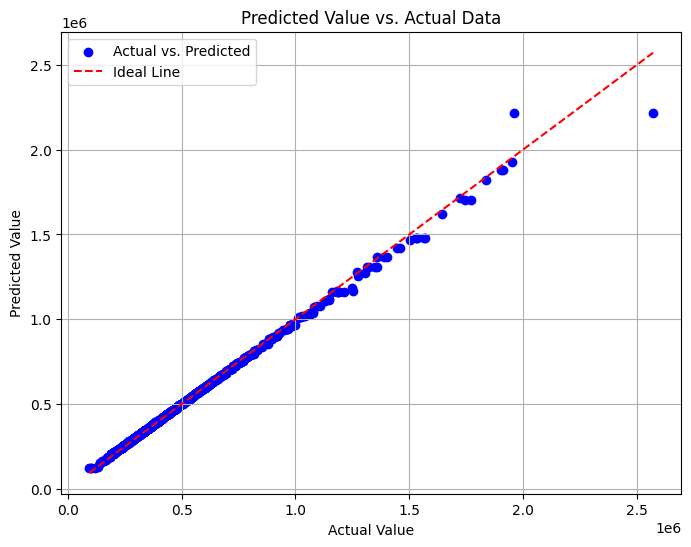

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.title('Predicted Value vs. Actual Data')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.grid(True)
plt.show()

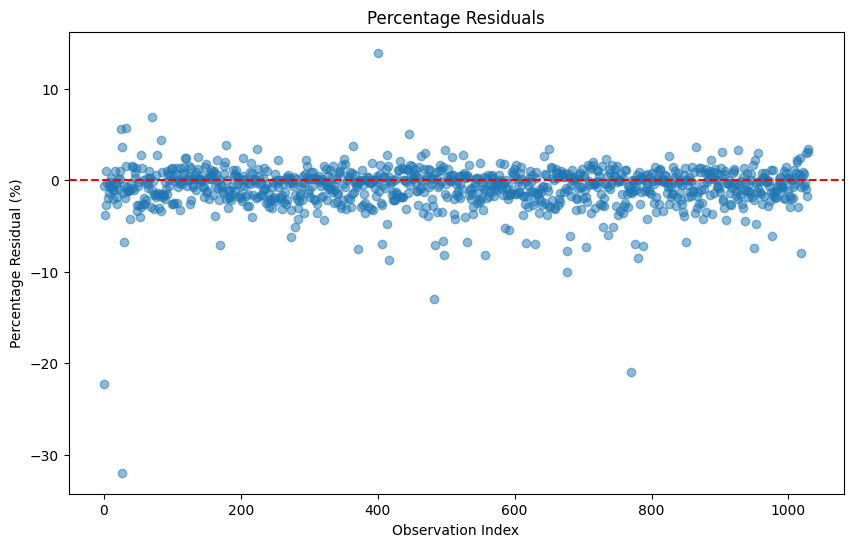

In [17]:
# Calculate percentage residuals: (Actual - Predicted) / Actual * 100
percentage_residuals = ((y_test - y_pred) / y_test) * 100

# Plotting percentage residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(percentage_residuals)), percentage_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Percentage Residuals')
plt.xlabel('Observation Index')
plt.ylabel('Percentage Residual (%)')
plt.show()